In [2]:
import pymssql
conn=pymssql.connect(host=r'(local)',database='web',user='sa',password='1234',charset='utf8')
cursor=conn.cursor()

In [3]:
cursor.execute('select top 5 * from ontime')
rows=cursor.fetchall()
for row in rows:
    print(row)

cursor.close()
conn.close()

('2008', '1', '3', '4', '2003', '1955', '2211', '2225', 'WN', '335', 'N712SW', '128', '150', '116', '-14', '8', 'IAD', 'TPA', '810', '4', '8', '0', '', '0', 'NA', 'NA', 'NA', 'NA', 'NA')
('2008', '1', '3', '4', '754', '735', '1002', '1000', 'WN', '3231', 'N772SW', '128', '145', '113', '2', '19', 'IAD', 'TPA', '810', '5', '10', '0', '', '0', 'NA', 'NA', 'NA', 'NA', 'NA')
('2008', '1', '3', '4', '628', '620', '804', '750', 'WN', '448', 'N428WN', '96', '90', '76', '14', '8', 'IND', 'BWI', '515', '3', '17', '0', '', '0', 'NA', 'NA', 'NA', 'NA', 'NA')
('2008', '1', '3', '4', '926', '930', '1054', '1100', 'WN', '1746', 'N612SW', '88', '90', '78', '-6', '-4', 'IND', 'BWI', '515', '3', '7', '0', '', '0', 'NA', 'NA', 'NA', 'NA', 'NA')
('2008', '1', '3', '4', '1829', '1755', '1959', '1925', 'WN', '3920', 'N464WN', '90', '90', '77', '34', '34', 'IND', 'BWI', '515', '3', '10', '0', '', '0', '2', '0', '0', '0', '32')


In [4]:
import pymssql
conn=pymssql.connect(host=r'(local)',database='web',user='sa',password='1234',charset='utf8')
cursor=conn.cursor()
cursor.execute('''
select uniquecarrier, avg(cast(depdelay as int)) 
from ontime
group by uniquecarrier
''')
rows=cursor.fetchall()
for row in rows:
    print('{}\t{}'.format(row[0],row[1]))

cursor.close()
conn.close()

B6	12
AA	12
UA	13
CO	13
HA	0
XE	11
YV	11
MQ	10
OH	11
9E	6
OO	7
DL	7
US	5
F9	5
AS	6
FL	9
NW	6
WN	10
EV	11
AQ	-1


In [5]:
import pymssql
conn=pymssql.connect(host=r'(local)',database='web',user='sa',password='1234',charset='utf8')
cursor=conn.cursor()
cursor.execute('''
select uniquecarrier, avg(cast(arrdelay as int)) 
from ontime
group by uniquecarrier
''')
rows=cursor.fetchall()
for row in rows:
    print(row)

cursor.close()
conn.close()

('B6', 10)
('AA', 12)
('UA', 11)
('CO', 10)
('HA', 1)
('XE', 10)
('YV', 11)
('MQ', 9)
('OH', 11)
('9E', 3)
('OO', 6)
('DL', 7)
('US', 2)
('F9', 6)
('AS', 4)
('FL', 8)
('NW', 7)
('WN', 5)
('EV', 10)
('AQ', -2)


In [6]:
import pymssql
conn=pymssql.connect(host=r'(local)',database='web',user='sa',password='1234',charset='utf8')
cursor=conn.cursor()
cursor.execute('''
select month,count(*)
from ontime
where year=2008 and arrdelay >0
group by month
order by cast(month as int)
''')
rows=cursor.fetchall()
for row in rows:
    print(row)

cursor.close()
conn.close()

('1', 279427)
('2', 278902)
('3', 294556)
('4', 256142)
('5', 254673)
('6', 295897)
('7', 264630)
('8', 239737)
('9', 169959)
('10', 183582)
('11', 181506)
('12', 280493)


In [7]:
x=list(range(1,13))
y=[]
for row in rows:
    y.append(row[1])
print(x)
print(y)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[279427, 278902, 294556, 256142, 254673, 295897, 264630, 239737, 169959, 183582, 181506, 280493]


<BarContainer object of 12 artists>

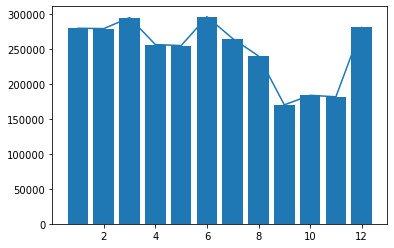

In [10]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(x,y)
plt.bar(x,y)

In [12]:
import pymssql
conn=pymssql.connect(host=r'(local)',database='web',user='sa',password='1234',charset='utf8')
cursor=conn.cursor()
cursor.execute('''
select dayofweek,sum(cast(arrdelay as int))
from ontime
group by dayofweek
order by dayofweek
''')
rows=cursor.fetchall()
for row in rows:
    print(row)

cursor.close()
conn.close()

('1', 8320958)
('2', 7526035)
('3', 6632859)
('4', 8512286)
('5', 11050619)
('6', 4872948)
('7', 9079273)


In [13]:
x=['월','화','수','목','금','토','일']
y=[]
for row in rows:
    y.append(row[1])
print(x)
print(y)

['월', '화', '수', '목', '금', '토', '일']
[8320958, 7526035, 6632859, 8512286, 11050619, 4872948, 9079273]


<BarContainer object of 7 artists>

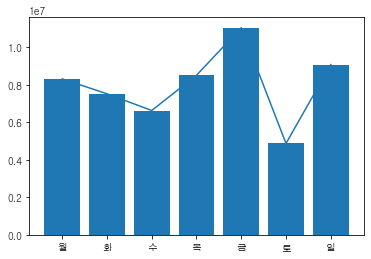

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc,font_manager
font_name=font_manager.FontProperties(fname='c:/windows/fonts/gulim.ttc').get_name()
rc('font',family=font_name)

plt.plot(x,y)
plt.bar(x,y)

In [15]:
import pymssql
conn=pymssql.connect(host=r'(local)',database='web',user='sa',password='1234',charset='utf8')
cursor=conn.cursor()
cursor.execute('''
select top 5 CRSDepTime,avg(cast(arrdelay as int)) arrdelay
from ontime
where month=10 and dayofweek=1
group by CRSDepTime
order by arrdelay
''')
rows=cursor.fetchall()
for row in rows:
    print(row)

cursor.close()
conn.close()

('2202', -28)
('2216', -22)
('1807', -20)
('2154', -17)
('1948', -16)
